## Практическая работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [1]:
# -- ВАШ КОД ТУТ

import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('non_linear.csv')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [3]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [4]:
X = generate_degrees(data['x_train'], 8)
X.shape

(50, 8)

In [5]:
model_ridge = Ridge(alpha=0.8).fit(X, data.y_train.values)
model_lasso = Lasso(alpha=0.8).fit(X, data.y_train.values)

C:\Anaconda 3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.335e+00, tolerance: 3.191e-03
  model = cd_fast.enet_coordinate_descent(


In [29]:
ridge_coef = pd.DataFrame([[j, round(i, 4)] for j, i in enumerate(model_ridge.coef_)], columns = ['number', 'coef'])
ridge_coef['type'] = 'ridge'
ridge_coef

,number,coef,type
0,0,0.5051,ridge
1,1,0.3501,ridge
2,2,-0.0001,ridge
3,3,-0.2300,ridge
4,4,0.0700,ridge
5,5,-0.0007,ridge
6,6,-0.0018,ridge
7,7,0.0002,ridge


In [31]:
lasso_coef = pd.DataFrame([[j, round(i, 4)] for j, i in enumerate(model_lasso.coef_)], columns = ['number', 'coef'])
lasso_coef['type'] = 'lasso'
lasso_coef

,number,coef,type
0,0,-0.0000,lasso
1,1,-0.0000,lasso
2,2,-0.0124,lasso
3,3,-0.0088,lasso
4,4,0.0009,lasso
5,5,0.0002,lasso
6,6,0.0000,lasso
7,7,-0.0000,lasso


In [36]:
coef_common = ridge_coef.merge(lasso_coef, on=['number', 'type', 'coef'], how='outer')
coef_common

,number,coef,type
0,0,0.5051,ridge
1,1,0.3501,ridge
2,2,-0.0001,ridge
3,3,-0.2300,ridge
4,4,0.0700,ridge
5,5,-0.0007,ridge
6,6,-0.0018,ridge
7,7,0.0002,ridge
8,0,-0.0000,lasso
9,1,-0.0000,lasso


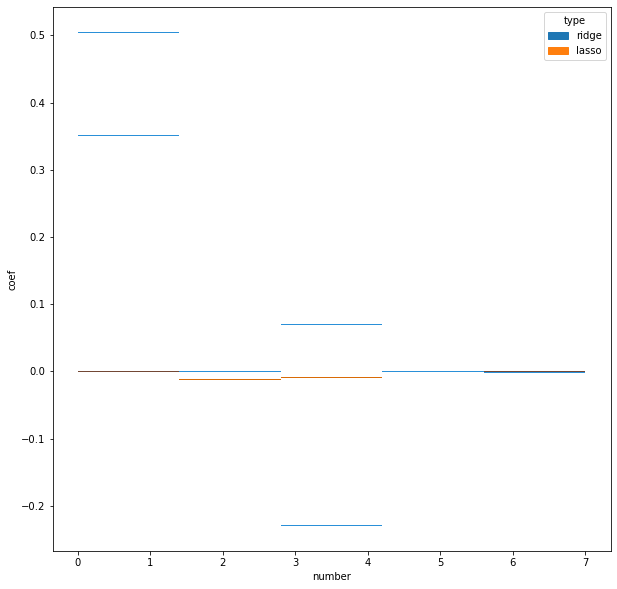

In [57]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
sns.histplot(data=coef_common, x='number', y='coef', hue = 'type')
plt.show()

Можно сделать вывод о том, что норма вектора w с регуляризацией Lasso имеет меньший вес, чем норма вектора w с регуляризацией Ridge. Некоторые коэффициенты очень близки либо равны нулю. Вероятно, модель переучена.

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!